# Real Estate Valuation in the Taiwan Market

The present project aims to predict the house prices at the Taiwan market. Given features as house ages, the number of convenience stores in the living circle and the distance to the nearest MRT (Mass Rapid Transit aka Public Transportation), the goal is predicting the house price (measured as house price per unit area).

As a methodology, we use Advanced Regression Models for this task. We choice a Linear Regression as a baseline model. On the hand, we use six types of advanced regressions: Ridge Regression, Lasso Regression, Bayesian Regression, Bayesian Ridge Regression, Bagging Regression and AdaBoost Regression.

Using Machine Learning models in Real State Valuation problems has a clear business impact. First, we can advise aspiring buyers of houses for pay the right price. On the other hand, we can also advise sellers for receive an adequate price that match with their interests.

### Content:

### 1. Getting started
### 2. Data exploration
### 3. Data analysis
### 4. Modeling
### 5. Results

# 1. Getting started

In [1]:
#Libraries

#Data wrangling
import pandas as pd

#Visualization
import matplotlib.pyplot as plt
import scikitplot as skplt

#Regression models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import BayesianRidge

#Tree-based regression models
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

#Model selection
from sklearn.model_selection import learning_curve
from sklearn.model_selection import cross_val_score
from sklearn.model_selection  import train_test_split

In [2]:
#Storing the data file
url = "https://raw.githubusercontent.com/Dedox-tech/Dataset/master/RealEstate.csv"

In [3]:
#Leer el archivo excel
dataset = pd.read_csv(url, sep = ",")

In [4]:
#Exploring the dataset
dataset.head()

,No,transaction date,house age,distance MRT,number of stores,latitude,longitude,Y house price of unit area
0,1,2012.916667,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.916667,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583333,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500000,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833333,5.0,390.56840,5,24.97937,121.54245,43.1


# 1.1 Explanation of the features

1. transaction date = date of the actual transaction (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)

2. house age = age of the house (unit: year)

3. distance MRT = the distance to the nearest MRT (Mass Rapid Transit: Public Transportation) station (unit: meter)

4. number of stores = the number of convenience stores in the living circle on foot (integer)

5. latitude = the geographic coordinate, latitude (unit: degree)

6. longitude = the geographic coordinate, longitude (unit: degree)

7. Y = house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

# 2. Data Exploration

In [5]:
#Displaying info about the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                            414 non-null int64
transaction date              414 non-null float64
house age                     414 non-null float64
distance MRT                  414 non-null float64
number of stores              414 non-null int64
 latitude                     414 non-null float64
 longitude                    414 non-null float64
Y house price of unit area    414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [6]:
#Showing descriptive stats
dataset.describe()

,No,transaction date,house age,distance MRT,number of stores,latitude,longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148953,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281995,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.666667,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.916667,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.166667,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.416667,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583333,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


# 3. Data Analysis

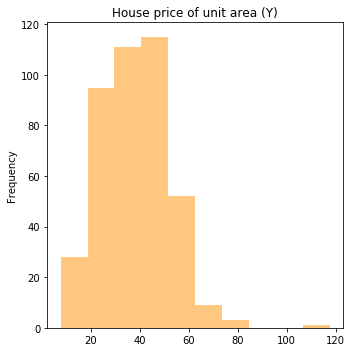

In [7]:
#Creating a figure
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (5,5))

#Ploting the target
dataset["Y house price of unit area"].plot(title = "House price of unit area (Y)", kind = "hist", colormap = "copper_r")

#Managing the aesthetic layout
fig.tight_layout()

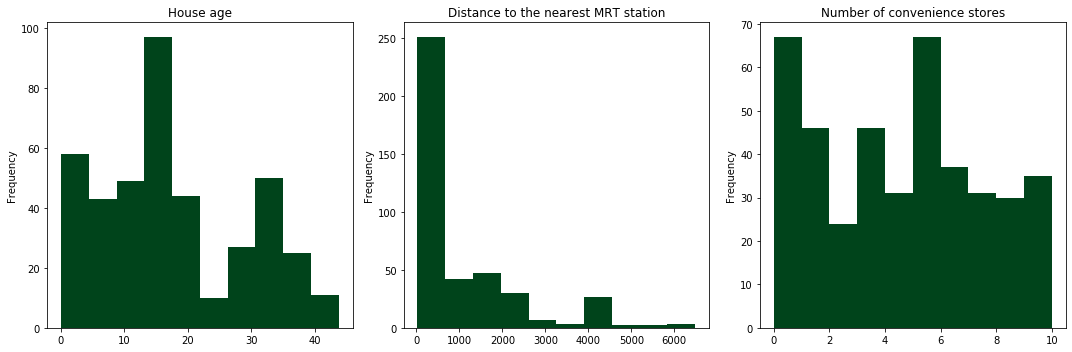

In [8]:
#Creating a figure
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

#Plotting the house age, the distance MRT and the number of stores
dataset["house age"].plot(title = "House age", kind = "hist", colormap = "Greens_r", ax = axes[0])
dataset["distance MRT"].plot(title = "Distance to the nearest MRT station", kind = "hist", colormap = "Greens_r", ax = axes[1])
dataset["number of stores"].plot(title = "Number of convenience stores", kind = "hist", colormap = "Greens_r", ax = axes[2])

#Managing the aesthetic layout
fig.tight_layout()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001FAD2D09F48>,
      dtype=object)

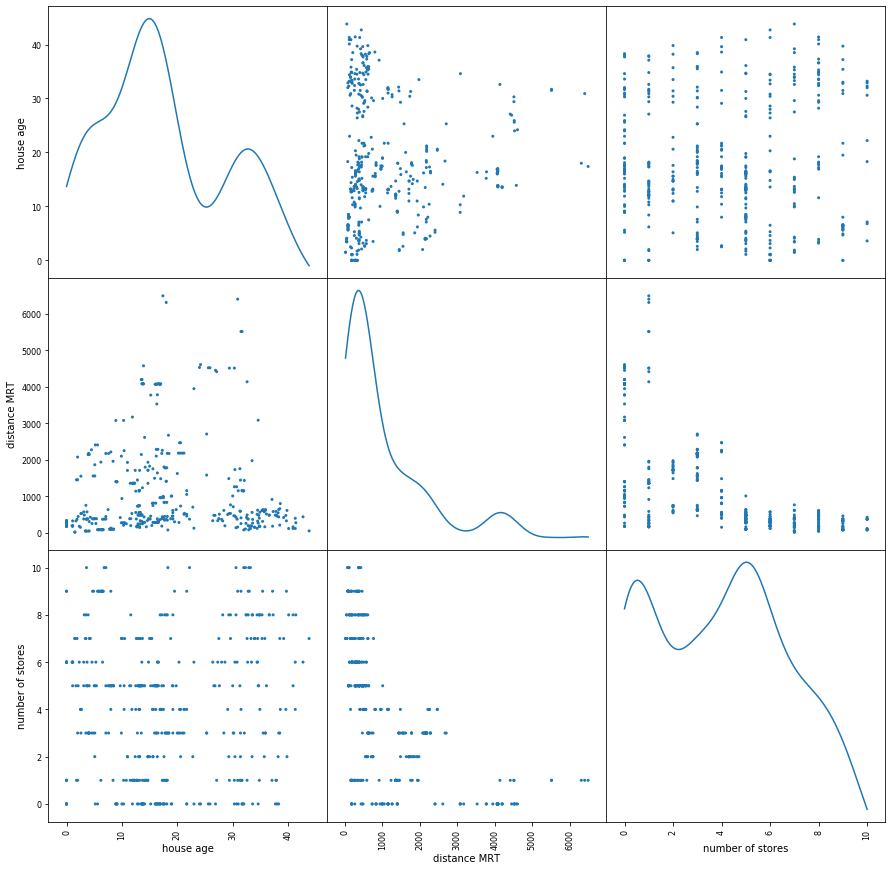

In [9]:
#Plotting a scatter matrix
pd.plotting.scatter_matrix(dataset[["house age", "distance MRT", "number of stores"]], diagonal = "kde", alpha = 1, range_padding = 0.15, figsize = (15,15))


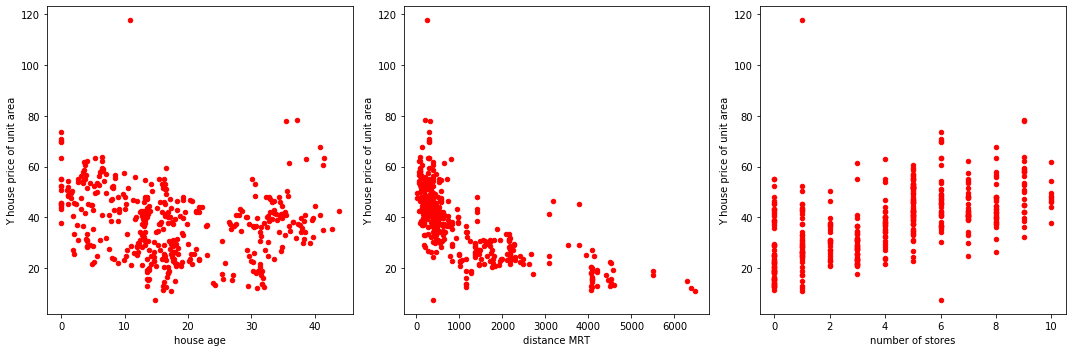

In [10]:
#Creating a figure
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

#Plotting the correlations between the features and the target
dataset[["house age","Y house price of unit area"]].plot(x = "house age", y = "Y house price of unit area", kind = "scatter", color = "red", ax = axes[0])
dataset[["distance MRT", "Y house price of unit area"]].plot(x = "distance MRT", y = "Y house price of unit area", kind = "scatter", color = "red", ax = axes[1])
dataset[["number of stores", "Y house price of unit area"]].plot(x = "number of stores", y = "Y house price of unit area", kind = "scatter", color = "red", ax = axes[2])

#Managing the aesthetic layout
fig.tight_layout()

# 4. Modeling

In [11]:
#Separation of X and y
y = dataset["Y house price of unit area"]
X = dataset[["transaction date", "house age", "distance MRT", "number of stores", " latitude"," longitude"]]

In [12]:
#Splitting the dasatet
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size=0.20)

# 4.1 Baseline model: Linear regression

In [13]:
#Using a linear regression
linear_regression = LinearRegression()

#Fitting the linear regression
linear_regression.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 4.2 Ridge Regression

In [14]:
#Using a ridge regression
ridge_regression = Ridge()

#Fitting the ridge regression
ridge_regression.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

# 4.3 Lasso Regression

In [15]:
#Using a lasso regression
lasso_regression = Lasso()

#Fitting the lasso regression
lasso_regression.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

# 4.4 Bayesian Regression

In [16]:
#Using a bayesian regression
bayesian_regression = ARDRegression()

#Fitting the bayesian regression
bayesian_regression.fit(X_train, y_train)

ARDRegression(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, threshold_lambda=10000.0, tol=0.001,
              verbose=False)

# 4.5 Bayesian Ridge Regression

In [17]:
#Using a ridge bayesian regression
ridge_bayesian_regression = BayesianRidge()

#Fitting the ridge bayesian regression
ridge_bayesian_regression.fit(X_train, y_train)

BayesianRidge(alpha_1=1e-06, alpha_2=1e-06, compute_score=False, copy_X=True,
              fit_intercept=True, lambda_1=1e-06, lambda_2=1e-06, n_iter=300,
              normalize=False, tol=0.001, verbose=False)

# 4.6 Bagging Regression

In [18]:
# Using a bagging regression
bagging_regression = BaggingRegressor(random_state=0, n_estimators=10)

#Fitting the bagging regression
bagging_regression.fit(X_train, y_train)

BaggingRegressor(base_estimator=None, bootstrap=True, bootstrap_features=False,
                 max_features=1.0, max_samples=1.0, n_estimators=10,
                 n_jobs=None, oob_score=False, random_state=0, verbose=0,
                 warm_start=False)

# 4.7 AdaBoost Regression

In [19]:
#Using an adaboost regression
adaboost_regression = AdaBoostRegressor(random_state=0, n_estimators=10)

#Fitting the adaboost regression
adaboost_regression.fit(X_train, y_train)

AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
                  n_estimators=10, random_state=0)

# 5. Results

# 5.1 Predictions and Accuracy







# 5.1.1 Baseline model: Linear Regression

In [20]:
#Get the predictions
predictions_linear_regression = linear_regression.predict(X_test)
print("House prices prediction: ")
print(predictions_linear_regression)
print("\n")

#Showing the scores
score_linear_regression = linear_regression.score(X_test, y_test)
print("Accuracy: ")
print(score_linear_regression)
print("\n")

#Showing the cross validation scores
cross_validation_linear_regression = cross_val_score(estimator = linear_regression, X = X, y = y, cv = 5)
print("Cross validation scores: ")
print(cross_validation_linear_regression)

House prices prediction: 
[40.0967049  12.84035943 42.01176917 12.64950384 42.44424319 39.83360536
 40.55625189 33.86188702 49.37215157 45.86918698 45.86337178 40.64686903
 39.5079928  40.05121985 47.11971988 38.14250437 40.08257673 41.1265919
 40.83763454 42.37660951 49.69757419 31.08051255 39.67419717 45.52923368
 46.18659224 43.42937492 46.35768625 26.20511858 48.13710314 21.54052717
 44.81117402 34.94185084 42.66565926 38.37623081 43.97813226 32.28344614
 47.62258753 39.7762931  52.55517308  7.46575176 52.54000722 33.12650654
 34.22236739 49.59324839 15.37779811 43.36073589 42.40583242 12.99775353
 33.99056407 48.50261569 53.6722684  38.72802683 47.73683114 25.42189121
 30.68830541 34.2729501  48.91181531 40.61827752 43.4575046  32.95450348
 43.85317099 43.62553622 39.55336042 47.01891077 36.83769996 30.00819936
  9.66198864 34.92460785 46.16636788 39.83360536 31.07547283 46.14975578
 44.94022444 30.68678413 40.64379678 36.24264907 31.13388031 13.07350294
 47.1243744  44.71846711 4

# 5.1.2 Ridge Regression

In [21]:
#Get the predictions
predictions_ridge_regression = ridge_regression.predict(X_test)
print("House prices prediction: ")
print(predictions_ridge_regression)
print("\n")

#Showing the scores
score_ridge_regression = ridge_regression.score(X_test, y_test)
print("Accuracy: ")
print(score_ridge_regression)
print("\n")

#Showing the cross validation scores
cross_validation_ridge_regression = cross_val_score(estimator = ridge_regression, X = X, y = y, cv = 5)
print("Cross validation scores: ")
print(cross_validation_ridge_regression)

House prices prediction: 
[39.32700158 13.37090956 41.42900906 13.02019585 42.27187188 40.91481432
 42.60175776 33.49462808 49.3510875  44.69164774 47.80123339 43.94263941
 38.85510894 42.18344475 46.47047347 37.27408135 41.16152126 40.83797649
 42.26772515 42.14229495 49.77417295 34.21487386 35.29679628 43.67514794
 45.30455547 44.77232433 47.61178207 26.01720991 46.71865745 22.03132836
 48.70616965 36.34665836 41.57126211 36.36680855 44.92632311 35.57016278
 46.75859158 38.34862197 50.56852357  3.48633985 53.99834417 32.10118927
 33.15293514 48.92415392 17.62718677 47.53145128 40.73683979 14.5950798
 34.01496728 52.53485098 54.25831066 37.23350629 46.56240111 29.41202752
 33.77148347 34.71695758 47.16776721 40.37828328 45.09065555 34.10458922
 42.95274851 43.98438756 38.5490826  46.69074741 38.63079353 29.90801783
  9.57319691 33.65958003 44.0640373  40.91481432 31.9144097  44.47658832
 45.09757083 30.3086928  38.84944297 36.23452338 30.61797869 12.85164827
 45.47382725 40.78025091 4

# 5.1.3 Lasso Regression

In [22]:
#Get the predictions
predictions_lasso_regression = lasso_regression.predict(X_test)
print("House prices prediction: ")
print(predictions_lasso_regression)
print("\n")

#Showing the scores
score_lasso_regression = lasso_regression.score(X_test, y_test)
print("Accuracy: ")
print(score_lasso_regression)
print("\n")

#Showing the cross validation scores
cross_validation_lasso_regression = cross_val_score(estimator = lasso_regression, X = X, y = y, cv = 5)
print("Cross validation scores: ")
print(cross_validation_lasso_regression)

House prices prediction: 
[41.53860511 12.80115383 40.32881474 12.45845367 40.77880004 41.01363483
 41.94326244 34.50651927 47.46384851 43.09255214 46.94621384 44.34552416
 41.092101   42.45364168 47.94475817 35.16675537 40.89658852 43.12275722
 43.53689976 43.13601426 51.8109337  34.6442545  36.47549979 43.93052101
 46.41028312 45.78557982 45.68346426 29.12477362 45.95278902 24.29212718
 46.70621809 35.0544291  43.68217468 34.36579786 45.80466074 34.59577591
 46.02798224 37.30852527 50.97216592  5.27861265 51.79017465 33.91089037
 35.04120229 46.3126166  17.08563304 46.82672266 42.55197087 17.31813191
 32.72332178 50.27189197 51.61701933 39.70346531 47.24620005 29.68755619
 34.6684938  36.74704519 46.37846097 40.2938146  47.04317102 35.15138628
 40.60780478 42.22545405 39.35846777 47.60928429 41.37405619 29.95002581
 12.64933511 31.44814065 46.54813604 41.01363483 33.89264206 46.04974621
 43.63350464 32.33436623 38.42943839 34.25950838 33.35203351 14.98921689
 43.85780312 38.72030402 

# 5.1.4 Bayesian Regression

In [23]:
#Get the predictions
predictions_bayesian_regression = bayesian_regression.predict(X_test)
print("House prices prediction: ")
print(predictions_bayesian_regression)
print("\n")

#Showing the scores
score_bayesian_regression = bayesian_regression.score(X_test, y_test)
print("Accuracy: ")
print(score_bayesian_regression)
print("\n")

#Showing the cross validation scores
cross_validation_bayesian_regression = cross_val_score(estimator = bayesian_regression, X = X, y = y, cv = 5)
print("Cross validation scores")
print(cross_validation_bayesian_regression)

House prices prediction: 
[35.28736329 15.78974207 41.85863662 15.56466476 35.84388983 41.80776574
 39.4822663  30.13763074 49.73832125 45.59720187 45.03761302 36.97521184
 34.52966406 39.04703501 48.25817189 36.3729547  41.42676333 35.76996518
 39.62977226 43.70013646 51.26135184 32.36830914 42.74783081 46.05402495
 47.87949717 44.4506193  47.27976438 25.17880844 48.2175748  34.88890578
 40.98673166 33.66339539 38.30281483 38.32611688 46.04244988 33.00000139
 48.9248491  37.60631198 55.04432394 16.42098937 53.1209633  31.1829634
 32.88149313 50.14043245 17.34665161 40.16436135 44.60081468 16.28960126
 31.64895905 44.08978649 53.33223259 40.88227884 49.56171851 21.29682806
 32.16643487 35.4802085  49.42099121 40.02459123 43.77422851 32.62795488
 44.54894204 43.48656224 34.69531356 48.52707676 36.45999021 29.31411577
 14.53648589 32.17892406 48.00787273 41.80776574 32.31676109 47.18213429
 45.66006038 29.45822457 41.16659135 34.65440188 31.52399785 17.21462865
 46.88759147 45.50657323 4

# 5.1.5 Bayesian Ridge Regression

In [24]:
#Get the predictions
predictions_ridge_bayesian_regression = ridge_bayesian_regression.predict(X_test)
print("House prices prediction: ")
print(predictions_ridge_bayesian_regression)
print("\n")

#Showing the scores
score_ridge_bayesian_regression = ridge_bayesian_regression.score(X_test, y_test)
print("Accuracy: ")
print(score_ridge_bayesian_regression)
print("\n")

#Showing the cross validation scores
cross_validation_ridge_bayesian_regression = cross_val_score(estimator = ridge_bayesian_regression, X = X, y = y, cv = 5)
print("Cross validation score: ")
print(cross_validation_ridge_bayesian_regression)

House prices prediction: 
[40.66675498 12.97611011 40.55634578 12.61894406 40.77524048 41.14693932
 42.14466835 33.79666825 48.12074551 43.46719775 47.34759817 44.28899183
 40.19672165 42.44110395 47.73253072 35.40095259 41.05667472 42.21243303
 43.27827816 43.01619406 51.70154256 34.37073821 36.1494724  43.84621056
 46.23837119 45.73707229 46.4202725  28.19040297 46.1993706  23.69820446
 47.29131134 34.99101203 42.90561213 34.4758887  45.86424746 34.66129018
 46.49523704 37.59228466 51.35662295  5.19345233 52.78495578 33.08718592
 34.54396416 47.24006128 17.25890531 47.18066244 42.29915564 16.69943636
 33.00124587 51.06329725 52.63661055 39.18535982 47.39249936 29.23948768
 34.2822471  36.08082656 46.63766792 40.26126779 46.76649421 34.52347797
 41.33872985 42.73320928 38.82816716 47.58979939 40.6817871  29.96061421
 11.98915737 31.82914055 46.01823084 41.14693932 33.0515107  45.73183654
 44.18189175 31.76941558 38.33951846 34.86096623 32.79564015 14.5741367
 44.22525364 39.16629647 4

# 5.1.6 Bagging Regression

In [25]:
#Get the predictions
predictions_bagging_regression = bagging_regression.predict(X_test)
print("House prices prediction: ")
print(predictions_bagging_regression)
print("\n")

#Showing the scores
score_bagging_regression = bagging_regression.score(X_test, y_test)
print("Accuracy: ")
print(score_bagging_regression)
print("\n")

#Showing the cross validation scores
cross_validation_bagging_regression = cross_val_score(estimator = bagging_regression, X = X, y = y, cv = 5)
print("Cross validation score: ")
print(cross_validation_bagging_regression)

House prices prediction: 
[75.6        16.16       56.05       17.03       35.55       38.96
 41.75       36.81       55.7525     43.64       41.66       20.04
 33.4        41.97       56.7        50.22       36.77       48.98
 41.41       46.07       51.97       27.215      36.53       53.24
 55.37       41.18       43.59       21.645      53.52       24.47
 47.4325     32.79       50.045      50.34       41.15       27.055
 46.29       26.13       54.22333333 14.86       52.245      35.74
 28.9        50.2        16.73       42.1225     39.41       13.9
 25.59       53.92333333 60.98       36.06       50.36       16.96
 27.215      33.79       56.52       38.04       41.86       28.38
 42.32       59.56       42.53       56.32       41.28       25.34
 15.34       18.74       56.53       38.96       23.4        53.83
 54.1        23.85       39.39       29.84       26.9        15.74
 49.54       43.74       45.65       27.185      37.32      ]


Accuracy: 
0.6909691754356337


Cross v

# 5.1.7 AdaBoost Regression

In [26]:
#Get the predictions
predictions_adaboost_regression = adaboost_regression.predict(X_test)
print("House prices prediction: ")
print(predictions_adaboost_regression)
print("\n")

#Showing the scores
score_adaboost_regression = adaboost_regression.score(X_test, y_test)
print("Accuracy: ")
print(score_adaboost_regression)
print("\n")

#Showing the cross validation scores
cross_validation_adaboost_regression = cross_val_score(estimator = adaboost_regression, X = X, y = y, cv = 5)
print("Cross validation score: ")
print(cross_validation_adaboost_regression)

House prices prediction: 
[58.38360656 20.27627119 49.87446809 20.27627119 39.50188679 45.28690476
 50.2125     38.03274336 57.32125    42.52747253 47.56666667 24.32307692
 39.50188679 47.56666667 50.82380952 44.13370787 42.52747253 49.23229167
 42.34805195 48.598      50.82380952 23.61372549 34.93157895 48.598
 45.89907407 44.13370787 42.52747253 30.28947368 49.87446809 25.41038961
 50.82380952 25.41038961 50.82380952 42.52747253 42.52747253 23.61372549
 48.598      30.49444444 49.87446809 20.27627119 45.28690476 42.34805195
 30.49444444 49.23229167 20.27627119 33.992      42.34805195 20.27627119
 25.64428571 49.23229167 57.32125    42.34805195 50.2125     22.64788732
 23.61372549 42.52747253 49.87446809 42.34805195 47.56666667 25.41038961
 42.34805195 54.93333333 38.03274336 50.82380952 47.56666667 25.41038961
 20.27627119 30.49444444 49.87446809 45.28690476 25.41038961 49.87446809
 54.93333333 30.28947368 42.52747253 25.64428571 25.64428571 20.27627119
 49.23229167 34.93157895 49.23

# 5.2 Learning Curves

# 5.2.1 Learning curve of the baseline model

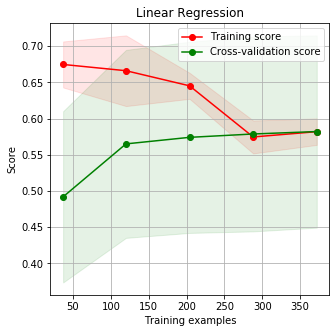

In [27]:
#Plotting the learning curve of the baseline model
skplt.estimators.plot_learning_curve(linear_regression, X, y, cv=10, title = "Linear Regression", figsize = (5,5))

# 5.2.2 Learning curves of the proper models

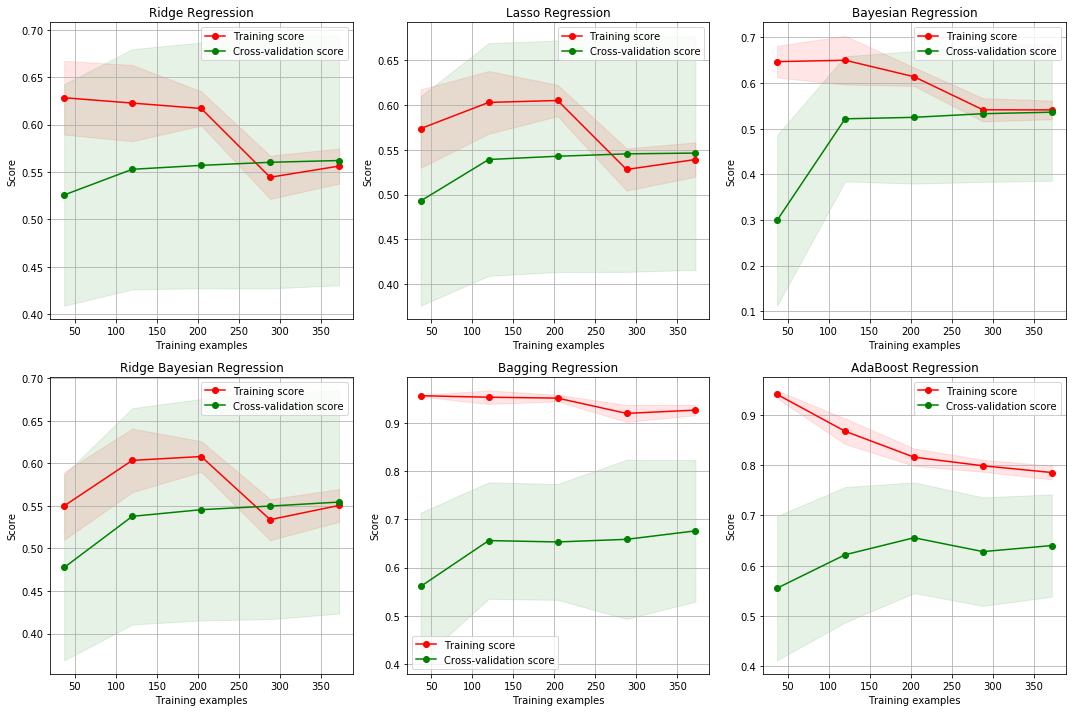

In [28]:
#Creating a figure
fig, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (15,10), squeeze = False)

#Plotting the learning curves of the models
skplt.estimators.plot_learning_curve(ridge_regression, X, y, cv=10, ax = axes[0,0], title = "Ridge Regression")
skplt.estimators.plot_learning_curve(lasso_regression, X, y, cv=10, ax = axes[0,1], title = "Lasso Regression")
skplt.estimators.plot_learning_curve(bayesian_regression, X, y, cv=10, ax = axes[0,2], title = "Bayesian Regression")
skplt.estimators.plot_learning_curve(ridge_bayesian_regression, X, y, cv=10, ax = axes[1,0], title = "Ridge Bayesian Regression")
skplt.estimators.plot_learning_curve(bagging_regression, X, y, cv=10, ax = axes[1,1], title = "Bagging Regression" )
skplt.estimators.plot_learning_curve(adaboost_regression, X, y, cv=10, ax = axes[1,2], title = "AdaBoost Regression")

#Managing the aesthetic layout
fig.tight_layout()